# Regression and regularisation

 - Regression is used when prediction a continuous dependent variable using one ore more independent variables.
 - Classical regression is not working well when the number of features is large or when the data contains plenty of noise or the dependency is non-linear
 - Application areas of classical regression can be extended by using regularisation
 - Non-linear regression models SVR, RFR, GBRT
 - Recursive feature elimination/addition are useful methods for model optimisation and feature selection 


## Ordinary Least mean Squares (OLS) regression

 - OLS using p-features $x_i$ to predict variable $y$.
 - $x_i$ are called as independent variables
 - $y$ is called as a dependent variable
 - $\beta_i$ are the model parameters
 - $\beta_0$ is the intersection, which is not always modeled
 
$$
    \hat{y}_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \beta_3 x_{i,3} + \cdots + \beta_p x_{i,p} + \epsilon_i
$$

Cost function to be minimized (square error):
$$
   Obj(\Theta) = L(\Theta) = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$

This Classic regression, usually the first choice to be tested. It Does not work well when **p is large** and when the training data contains **plenty of noise**

The **prediction** with the model is the following:

$$  \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2, ..., \beta_n x_n + \epsilon$$

In 1-dimensional case, the regression is simply

$$  \hat{y} = \beta_0 + \beta_1 x + \epsilon$$,

where $\beta_1$ is the reciprocal and $\beta_0$ is the constant (the y-axis crossing point) and $\epsilon$ is the prediction error. The optimal solution is when the squared sum of error (Loss function, $L()$) between predicted and true values is minimized:

$$
   L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

The linear regression has a well known solution, which can be calculated very efficiently (closed form):

$$
   \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T Y,
$$

Where $\mathbf{X}$ is a design matrix containing data samples in rows, and variables in columns. It is also called as design matrix, at it was shown in the top of this section.

## The fitness of a regression model

The fitness of a regression model is often estimated using coefficient of determination ($R^2$) or Root Mean Square Error of prediction (RMSE).

### Coefficient of determination, $R^2$
The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), $R^2$, defines how large proportion of the variance in $y$ is explained by the model. $R^2$ is zero if the model cannot predict anything and it is 1 when the model fit is perfect. 

$$
    R^2 = 1- \frac{\mathrm{var(residual)}}{\mathrm{var}(y)} = 1- \frac{\Sigma_{i=1}^{n} (y_i - \hat{y}_i)^2}{\Sigma_{i=1}^{n} (y_i - \bar{y})^2}
$$

For Ordinary Least mean Squares regression models (OLS) it is the same as the square of the Pearson correlation coefficient.

$$
   R^2 = \rho^2
$$

### Root Mean Square Error, RMSE
[RMSE](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e), is another often used measure for model fitness. RMSE shows the average prediction error in the same units and scale than $y$.

$$
   \mathrm{RMSE} = \sqrt{ \left( \frac{\sum_{i=i}^{n} (y_i - \hat{y}_i)^2}{n} \right) }
$$

## Regularization and model simplicication
![William_of_Ockham_-_Logica_1341.jpg](kuvat/William_of_Ockham_-_Logica_1341_s.jpg)

<span id="kuvaviite">Ockham - from a manuscipt of Ockham's Summa Logicae, MS Gonville and Caius College, Cambridge, 464/571, fol. 69r</span>

> "Simpler solutions are more likely to be correct than complex ones"
>
        >William of Ockham

Finding a model which fits to the data is not necessarily optimal. It may be unnecessary complex, which can cause problems in:
 - Generalization: too complex models may have unnecessary complex decision boundary or use redundant or unimportant variables in a regression model, which are producing noise to the model. The model may event fit to the noise in the training data, which is not repeated similarly in new samples.
 - Explainability: A complex model is difficult to understand, explain and believe.
 - Stability: Too complex model may have problems in converging in noisy training data and also the prediction can be too noise sensitive
 - Unnecessary high dimensionality means costs in recording, transferring, storing and processing data

Therefore it is important to use means for simplifying data and making the models more stable.


### L2 regularization, Ridge regression
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \underbrace{\lambda \sum_{j=1}^p \beta_j^2}_{\Omega(\Theta)}
$$

* Regularization term, $\Omega(\Theta)$, makes it suitable for higher dimensional data
* Minimal unbiased estimator in certain cases
* Can be solved in closed form
* All coefficients are always kept -> **Does not provide a parsimonious model**

-------
<div class=citation>
Hoerl, Arthur E., ja Robert W. Kennard. ”Ridge Regression: Biased Estimation for Nonorthogonal Problems”. Technometrics 12, nro 1 (1. Feb 1970): 55–67. https://doi.org/10.1080/00401706.1970.10488634.
</div>

### L1 regularization, LASSO
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p |\beta_j|
$$

* L1 regularization tends to lead solutions where many coefficients, $\beta_i$ will be zeros -> **sparse model**.
* Only iterative solutions are available, but for example <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">Least Angle Regression</a> (LARS) is fast method for finding LASSO solution
* Will saturate if p>n, and select at maximum n feautures
* in cases where n>p and high correlation between predictors, L1 is worse than L2

-----
<div class="citation">Tibshirani, Robert. ”Regression Shrinkage and Selection Via the Lasso”. Journal of the Royal Statistical Society: Series B (Methodological) 58, nro 1 (1996): 267–88. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x.
</div>

### Elastic nets
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p \left( (1-\alpha) \beta_i^2 + \alpha |\beta_j| \right)
$$

* Elastic net can perform like Rigde regression, when $\alpha$=0 or like LASSO when $\alpha$=1
* For suitable value of, $\alpha$, elastic net will also produce sparse model, but it does not saturate to in cases when n<p like LASSO.
* Can tolerate correlation between predictors
* Can be computed interatively quite efficiently



<div class="citation">Zou, Hui, ja Trevor Hastie. ”Regularization and variable selection via the elastic net”. Journal of the Royal Statistical Society: Series B (Statistical Methodology) 67, nro 2 (1. April 2005): 301–20. https://doi.org/10.1111/j.1467-9868.2005.00503.x.</div>


### Gradient Tree Boosting 
 - Also called as Gradient Boosted Regression Trees (GBRT)
 - The GBRT has similar formal loss function and measure for complexity as linear regrssion
 
 $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$
 
 

## Coding examples

Pay attention especially for these rows 

 - Build the model:

`    
model = Model(<model parameters>).fit(X,y)
`

 - Validate the model with R2 score in testing set and calculating Cross validation R2 score or R2 score and finaly for a separate testing set:

`    
model.score(X,y)
model.cross_val_score(model, X, y, cv=5).mean()
model.score(X_test, y_test)
`

 - Variable selection:
 
`    
sfm = SelectFromModel(model, threshold=0.3)
cross_val_score(model, sfm.transform(X), y, cv=5).mean()
model.score(sfm.transform(X),y)
`

 - Recursive feature selection
 
`    
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
`

### Boston house prizes example

Can the house prizes be predicted? Which parameters affect most to the house prizes?

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per \$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import cross_val_score
import pandas as pd

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

boston=load_boston()
# Scaling is not necessary, but can be done
X= scaler.fit_transform(boston['data'])
Xorig= boston['data']
y= boston['target']
Boston = pd.DataFrame(data=X, columns=boston['feature_names'])
Boston['target'] = y
print(Boston.shape)
Boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


CV score.......... 0.3532759243958823
Training score.... 0.7406426641094094


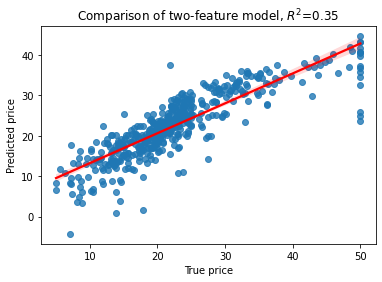

In [8]:
# Ordinary Linear Regression First
lr=LinearRegression().fit(X,y)
yhat=lr.predict(X)

# Cross_val_score and score are coefficient of determinations, R^2
RsquaredCV=cross_val_score(lr, X, y, cv=5).mean()
RsquaredTR=lr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.41282930221133507
Training score.... 0.7394797644213642


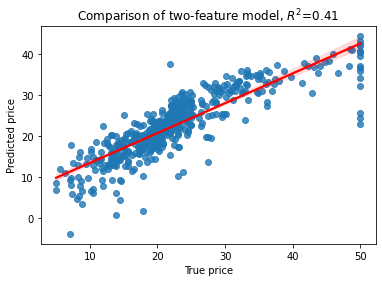

In [9]:
# Then L2 regularized Ridge Regression
rr=Ridge(alpha=12).fit(X,y)
yhat=rr.predict(X)
RsquaredCV=cross_val_score(rr, X, y, cv=5).mean()
RsquaredTR=rr.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.40368942076383674
Training score.... 0.7353093744353657


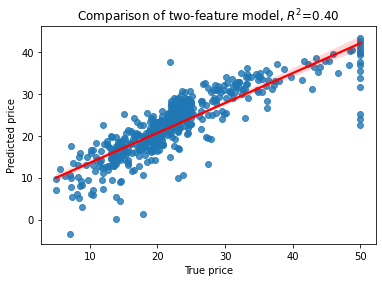

In [10]:
# L1 regularized Lasso Regerssion
la=Lasso(alpha=0.1).fit(X,y)
yhat=la.predict(X)
RsquaredCV=cross_val_score(la, X, y, cv=5).mean()
RsquaredTR=la.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.4497867885311699
Training score.... 0.6877704284092927


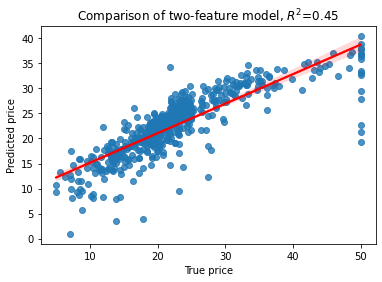

In [11]:
# L2 + L1 regularized Elastic Net
en=ElasticNet(alpha=0.5, l1_ratio=0.1).fit(X,y)
yhat=en.predict(X)
RsquaredCV=cross_val_score(en, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.4269743096160286
Training score.... 0.6877704284092927
alpha=0.192143, L1-ratio=0.500000


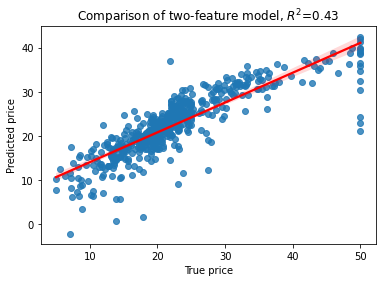

In [12]:
# Lets use Elastic Net for selecting the most relevant features
#model = LassoCV(cv=5)
model = ElasticNetCV(cv=5).fit(X,y)
yhat=model.predict(X)
RsquaredCV=cross_val_score(model, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)
 
sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

print("alpha=%f, L1-ratio=%f" % (model.alpha_, model.l1_ratio))

In [13]:
# Lets use Elastic Net for selecting the most relevant features
#model = LassoCV(cv=5)
model = ElasticNetCV(cv=5)

sfm = SelectFromModel(model, threshold=1.5)
sfm.fit(X, y)

print(sfm.transform(X).shape)
print("Selected variables are", sfm.transform([boston['feature_names'], boston['feature_names']])[0])
        

(506, 4)
Selected variables are ['RM' 'DIS' 'PTRATIO' 'LSTAT']


CV score.......... 0.40003779874768775
Training score.... 0.6879971162429187


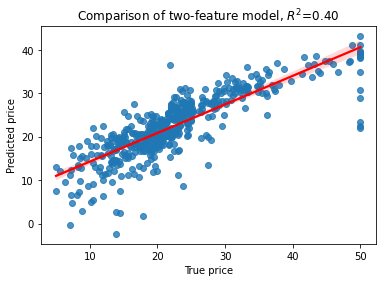

In [14]:
model.fit(sfm.transform(X), y)
yhat=model.predict(sfm.transform(X))
RsquaredCV=cross_val_score(model, sfm.transform(X), y, cv=5).mean()
RsquaredTR=model.score(sfm.transform(X),y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)

## Gradient tree regression

CV score.......... 0.626366365265601
Training score.... 0.97128947882335


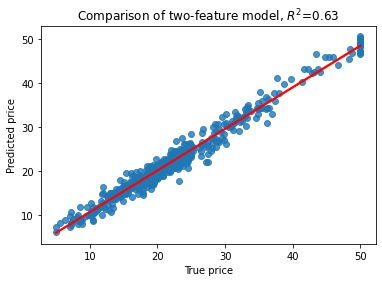

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
#                                max_depth=2, random_state=0, loss='ls')
est = GradientBoostingRegressor(max_features=3)
est.fit(X, y)
yhat=est.predict(X)
RsquaredCV=cross_val_score(est, X, y, cv=5).mean()
RsquaredTR=est.score(X,y)

sns.regplot(x=y,y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

 0     CRIM= 0.03
 1       ZN= 0.00
 2    INDUS= 0.04
 3     CHAS= 0.00
 4      NOX= 0.07
 5       RM= 0.36
 6      AGE= 0.02
 7      DIS= 0.07
 8      RAD= 0.01
 9      TAX= 0.02
10  PTRATIO= 0.10
11        B= 0.02
12    LSTAT= 0.27


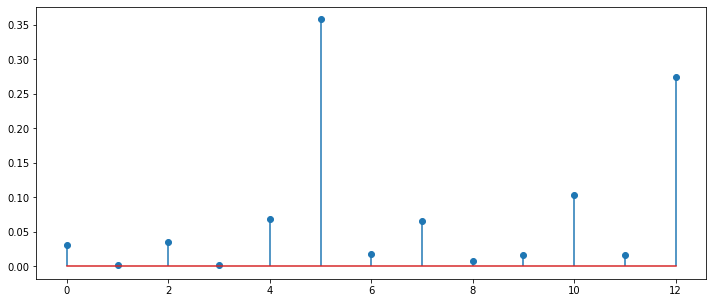

In [16]:
# Plot the importance of each feature
plt.figure(figsize=(12,5))
#Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)
i=range(len(boston.feature_names))
plt.stem(est.feature_importances_)
ax=plt.gca()
#ax.set_xticklabels(boston.feature_names);

for i in range(len(boston.feature_names)):
    print("%2d %8s=%5.2f" % (i,boston.feature_names[i], est.feature_importances_[i]))

In [17]:
sns.heatmap( ))
Boston.corr()


SyntaxError: unmatched ')' (2152249459.py, line 1)

[ 5 12 10]
(506, 3)
CV score.......... 0.5937503112529153
Training score.... 0.9278484513308207


GradientBoostingRegressor()

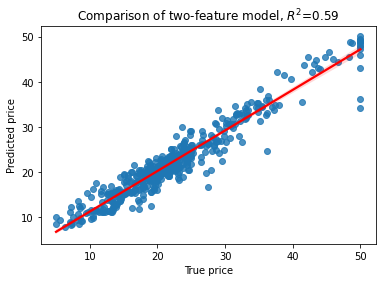

In [18]:
selected=est.feature_importances_.argsort()[-1:-4:-1]
print(selected)

Xs=X[:,selected]
print(Xs.shape)

ests = GradientBoostingRegressor()
ests.fit(Xs, y)
yhat=ests.predict(Xs)
RsquaredCV=cross_val_score(ests, Xs, y, cv=5).mean()
RsquaredTR=ests.score(Xs,y)

sns.regplot(x=y, y=yhat, line_kws={"color": "red"})
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
ests


## Recursive feature elimination

An example of familiar digits classification

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y) 

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=1)

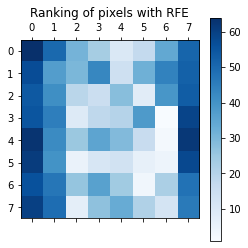

In [20]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [21]:
rfe.ranking_.reshape(digits.images[0].shape)

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

## Summary

- **Classical regression** is simple and well understood, and is a good model, when its conditions are met
    - The number of features is much less than number of samples
    - There is not too much noise in the data
    - The linear model is sufficient
    - Data needs to be normalized before use
    - Categorical data is not well supported, at least needs to be converted to numerical for example using one hot encoding
 - **Regularisation** includes many methods for balancing the trade off between model complexity and prediction error which prevents against over-fitting of the model
    - Regularization is often used in two forms: **L2**-regularization minimises the squared sum of model parameters, **L1**-regularization minimises the absolute sum of the model parameters.
- Non-linear regression models **SVR, RFR, GBRT** extend the regression to non-linear problems
- **Ensemble models** include a bag (parallel) or boosted (serial) combination of many simple models, which are randomized (bag) or boosted versions of simple regressors
    - Extratrees and Gradient Boosted Regression Trees can also use categorical data directly and they do not need the normalization of data
- Recursive feature elimination (**RFE**)/addition are useful methods for model optimisation and feature selection 
- The feature importances measure in RF and GBTR models provides a clue for the importance of features
- **R2-score** and **RMSE** are typical measures for model performance
